In [78]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

from __future__ import print_function # Adds compatibility with Python 2

# Install xlrd to read excel files
!pip3 install xlrd


In [48]:
# Putting the Artist layer to use
fig = Figure()
canvas = FigureCanvas(fig)

# Create 10000 random numbers
x = np.random.randn(10000)

# Create an axis artist, equivalently add_subplot(111)
ax = fig.add_subplot(1, 1, 1)

# Generate a histogram
ax.hist(x, 100)

# Add a title to the figure
ax.set_title('Normal distribution with $\mu=0, \sigma=1$')

# Save the figure to file
fig.savefig("normal_dist_hist.png")

In [49]:
# Do the same as above but with the scripting layer (higer level abstraction)
x = np.random.randn(10000)
plt.hist(x, 100)
plt.title('Normal distribution with $\mu=0, \sigma=1$')
plt.savefig("normal_dist_hist.png")
plt.show()
plt.close()

<IPython.core.display.Javascript object>


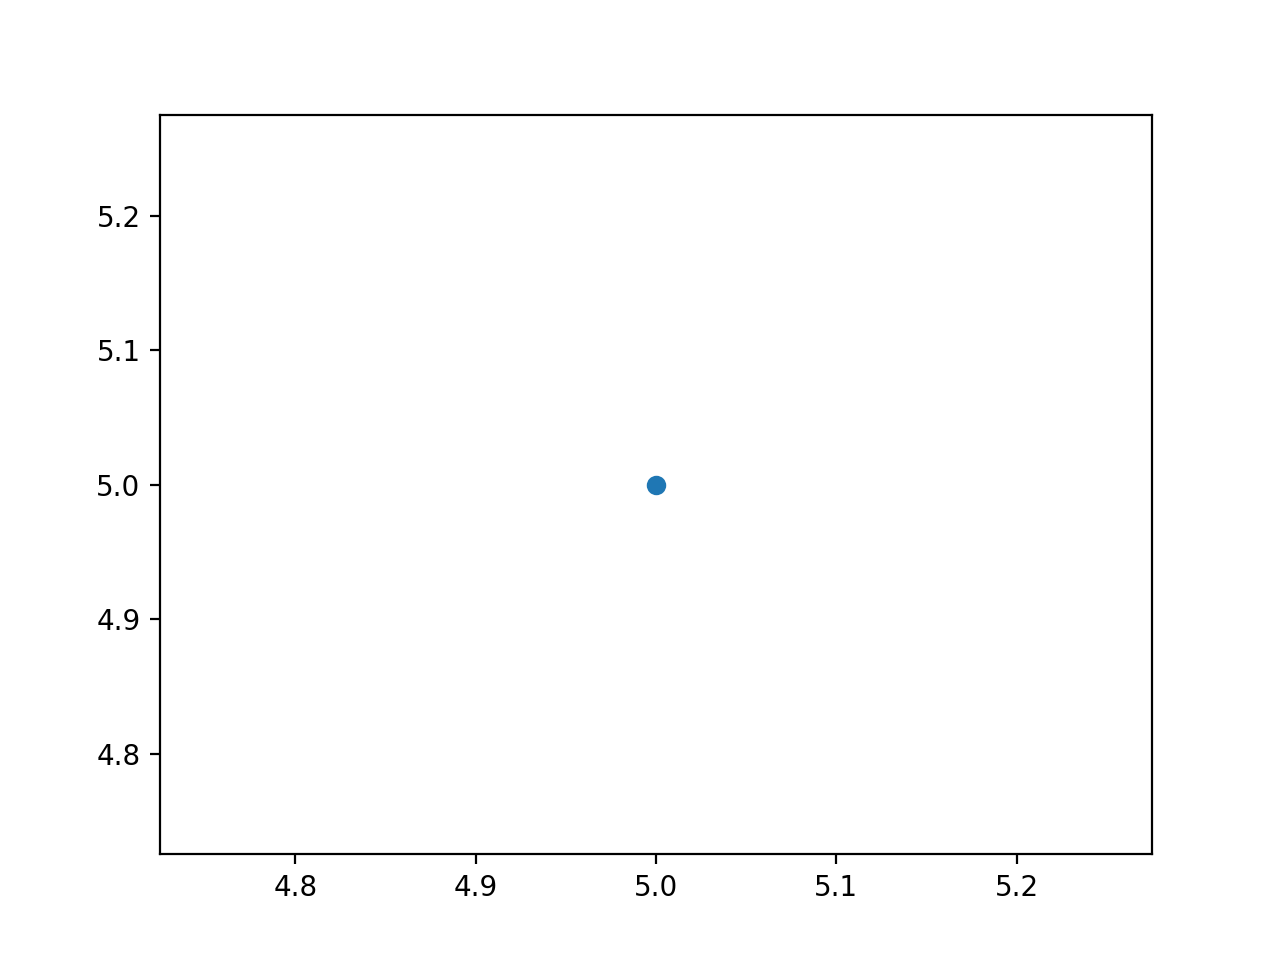

In [50]:
# Plot a circle, use magic function to do the inline plotting
plt.plot(5, 5, 'o')
plt.show()

<IPython.core.display.Javascript object>


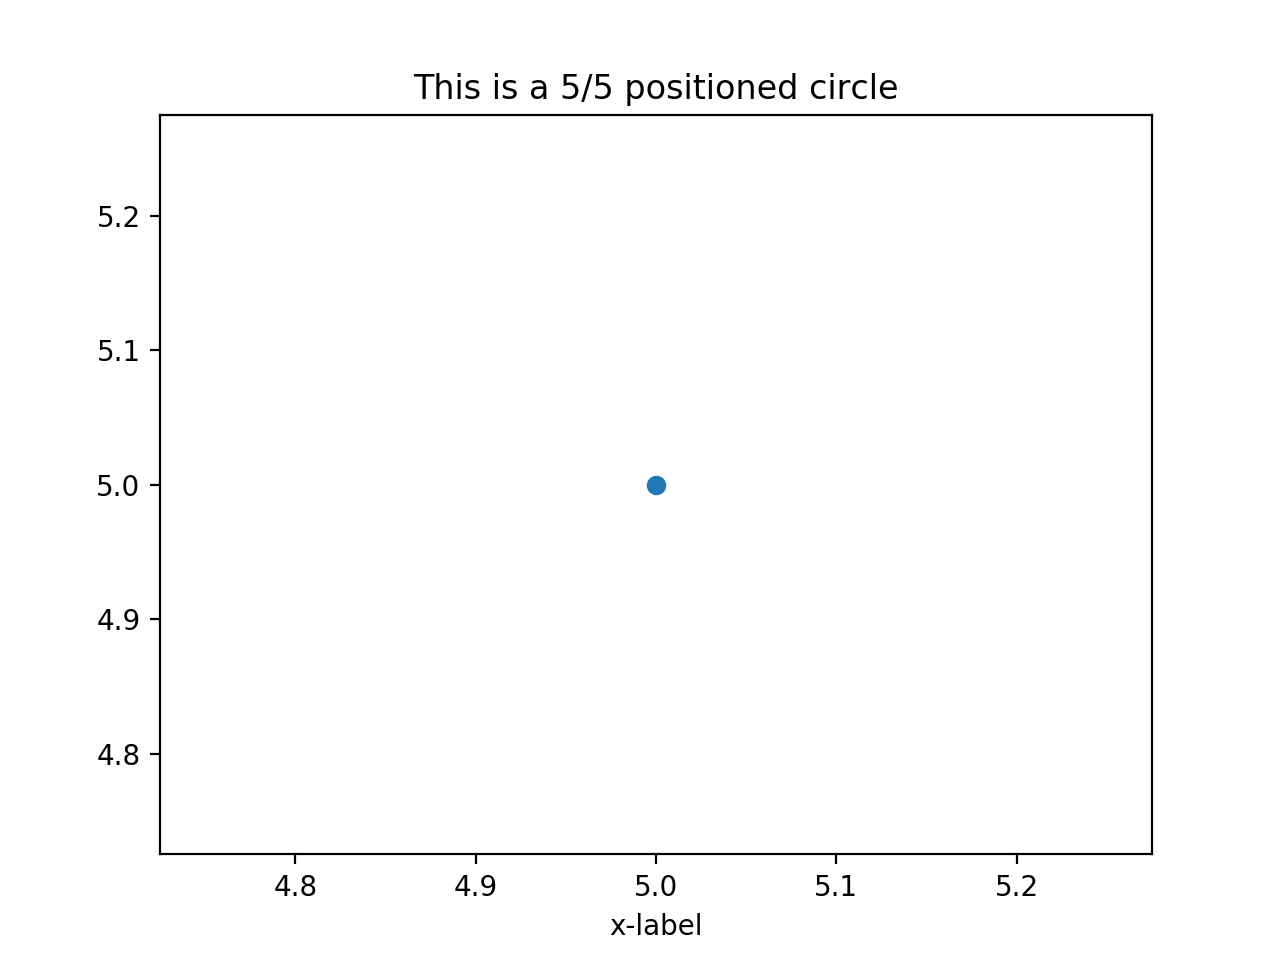

Text(0.5, 1.0, 'This is a 5/5 positioned circle')

In [51]:
# Using the notebook magic function will allow to modify
# the currently active figure, as normally once the figure
# is shown it can not be modified any more. If figure does
# not exist a new figure will be rendered. Also note the controls.
%matplotlib notebook
plt.plot(5, 5, 'o')
plt.show()
plt.title('This is a 5/5 positioned circle')

In [52]:
# Add a label to the plot above
plt.xlabel("x-label")

Text(0.5, 47.04444444444444, 'x-label')

In [53]:
# Pandas also has an implementation of Matplotlib
df = pd.DataFrame({ "Year" : [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994],\
                    "India": [8880, 8860, 8147, 7338, 5704, 5123, 6682, 3308, 1863, 1527, 8880, 8860, 8147, 7338, 5704],\
                    "China": [5123, 6682, 3308, 1863, 1527, 8880, 8860, 8147, 7338, 5704, 5123, 6682, 3308, 1863, 1527]})
df = df.set_index("Year")
display(df)

,India,China
Year,,
1980,8880,5123
1981,8860,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527
1985,5123,8880
1986,6682,8860
1987,3308,8147
1988,1863,7338


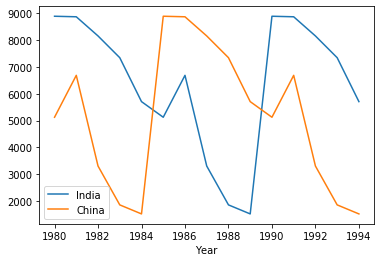

In [54]:
# Plot the data from the data frame as line plots
%matplotlib inline
df.plot(kind="line")

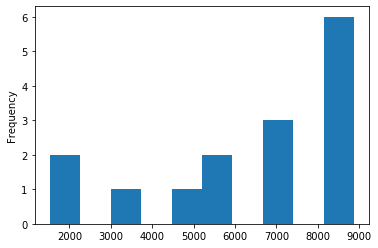

In [55]:
# Plot the data from the data frame a histogram
df['India'].plot(kind="hist")

In [63]:
file_name = "data" + os.path.sep + "Canada.csv"

if os.path.exists(file_name) :
    df_can = pd.read_csv(file_name)
else :
    # Read the data set
    df_can = pd.read_excel('http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                          sheet_name = 'Canada by Citizenship',
                          skiprows = range(20), skip_footer = 2)
    df_can.to_csv(file_name, index = False)

df_can.head()
df_can.info()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [64]:
# Set the country to be the index, and drop and rename columns
df_can = df_can.set_index('OdName')
df_can.index.name = 'Country'
df_can.drop(['Type', 'Coverage', 'AREA', 'REG', 'DEV'], axis = 1, inplace = True)
df_can.rename(columns = {"AreaName" : "Continent", "RegName" : "Region"}, axis = 1, inplace = True)

In [76]:
# Add a summary column to the table, using df_can.sum(axis=1) should also work
df_can['Total'] = df_can.loc[:,'1980':'2013'].sum(axis=1)

# Show the result
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


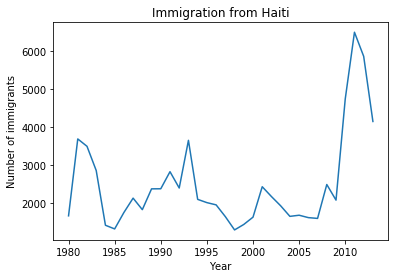

In [79]:
# First get the list of years as strings
years = list(map(str,range(1980,2014)))

# Plot the data with the line plot
df_can.loc['Haiti', years].plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Year')
plt.show()

In [81]:
# To get the list of column headers we can call upon the dataframe's `.columns` parameter.
df_can.columns.values

array(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', 'Total'],
      dtype=object)

In [82]:
# Similarly to get the indexes we used the `.index` parameter.
df_can.index.values

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong Special Administrative Region',
       'China, Macao Special Administrative Region', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 

In [84]:
# The default type of index and columns is NOT list.
print(type(df_can.columns))
print(type(df_can.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.base.Index'>


In [87]:
# To get the index and columns as lists, we can use the tolist() method.
print(df_can.columns.tolist())
print(type(df_can.index.tolist()))

['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', 'Total']
<class 'list'>


In [88]:
# size of dataframe (rows, columns))
print(df_can.shape)

(197, 38)


In [95]:
# We can check to see how many null objects we have in the dataset as follows: Visual inpection
df_null = df_can.isnull()
df_null.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Albania,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Algeria,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
American Samoa,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Andorra,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [99]:
# We can check to see how many null objects we have in the dataset as follows: Sums per column
print(df_null.sum(axis=0))


Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64
Country
Afghanistan       0
Albania           0
Algeria           0
American Samoa    0
Andorra           0
                 ..
Yemen             0
Zambia            0
Zimbabwe          0
Unknown           0
Total             0
Length: 197, dtype: int64


In [100]:
# We can check to see how many null objects we have in the dataset as follows: Sums per row
print(df_null.sum(axis=1))

Country
Afghanistan       0
Albania           0
Algeria           0
American Samoa    0
Andorra           0
                 ..
Yemen             0
Zambia            0
Zimbabwe          0
Unknown           0
Total             0
Length: 197, dtype: int64


In [104]:
# We can also use the describe function to get the immigration statistics per year
df_can.loc[:,"1980":"2013"].describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,...,197.000000,197.00000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,1453.167513,1306.000000,1230.203046,905.431472,896.162437,856.304569,1008.639594,1543.908629,1640.456853,1944.670051,...,2394.131980,2662.35533,2554.720812,2403.583756,2510.091371,2560.101523,2849.614213,2525.360406,2618.304569,2629.654822
std,10784.524807,9449.373841,8864.905615,6503.149859,6452.570413,6155.858422,7205.630681,11045.558746,11809.252241,13939.908653,...,17119.626937,19104.65330,18261.461660,17129.490442,17908.071420,18276.881231,20386.174875,18082.496369,18763.159434,18838.224387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,21.000000,29.00000,26.000000,32.000000,32.000000,37.000000,42.000000,38.000000,43.000000,45.000000
50%,14.000000,10.000000,12.000000,12.000000,14.000000,17.000000,21.000000,33.000000,36.000000,45.000000,...,196.000000,211.00000,230.000000,198.000000,205.000000,217.000000,216.000000,196.000000,235.000000,217.000000
75%,266.000000,299.000000,299.000000,197.000000,207.000000,202.000000,257.000000,467.000000,476.000000,538.000000,...,866.000000,857.00000,856.000000,975.000000,975.000000,917.000000,953.000000,851.000000,799.000000,852.000000
max,143137.000000,128641.000000,121175.000000,89185.000000,88272.000000,84346.000000,99351.000000,152075.000000,161585.000000,191550.000000,...,235822.000000,262242.00000,251640.000000,236753.000000,247244.000000,252170.000000,280687.000000,248748.000000,257903.000000,259021.000000


In [106]:
# Select a Column: A single column as Series
df_can.Continent  # returns a Series

Country
Afghanistan          Asia
Albania            Europe
Algeria            Africa
American Samoa    Oceania
Andorra            Europe
                   ...   
Yemen                Asia
Zambia             Africa
Zimbabwe           Africa
Unknown             World
Total               World
Name: Continent, Length: 197, dtype: object

In [110]:
# Select a Column: A single column as Series
df_can['Continent'] # returns a Series

Country
Afghanistan          Asia
Albania            Europe
Algeria            Africa
American Samoa    Oceania
Andorra            Europe
                   ...   
Yemen                Asia
Zambia             Africa
Zimbabwe           Africa
Unknown             World
Total               World
Name: Continent, Length: 197, dtype: object

In [111]:
# Select columns as a data frame we use double brackets
df_can[['Continent', "1980", "1981", "1982", "1983", "1984", "1985"]]

,Continent,1980,1981,1982,1983,1984,1985
Country,,,,,,,
Afghanistan,Asia,16,39,39,47,71,340
Albania,Europe,1,0,0,0,0,0
Algeria,Africa,80,67,71,69,63,44
American Samoa,Oceania,0,1,0,0,0,0
Andorra,Europe,0,0,0,0,0,0
...,...,...,...,...,...,...,...
Yemen,Asia,1,2,1,6,0,18
Zambia,Africa,11,17,11,7,16,9
Zimbabwe,Africa,72,114,102,44,32,29


In [112]:
# Select Rows: filters by the labels of the index/column
df_can.loc['Afghanistan':'Andorra']

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [115]:
# Select Rows: filters by the positions of the index/column
df_can.iloc[1:4:2]


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6


In [118]:
# Select via index and transpose
print(df_can[df_can.index == 'Japan'].T.squeeze())

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [120]:
# Can select rows/columns with index names and values: Japan for years 1980 to 1985
print(df_can.loc['Japan', ['1980', '1981', '1982', '1983', '1984', '1984']])
print(df_can.iloc[87, [3, 4, 5, 6, 7, 8]])

1980    701
1981    756
1982    598
1983    309
1984    246
1984    246
Name: Japan, dtype: object
1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object


In [121]:
# We can convert the column names into strings, if not yet
df_can.columns = list(map(str, df_can.columns))


In [122]:
# Create the condition boolean series
condition = df_can['Continent'] == 'Asia'
print(condition)

Country
Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Yemen              True
Zambia            False
Zimbabwe          False
Unknown           False
Total             False
Name: Continent, Length: 197, dtype: bool


In [127]:
# Pass this condition into the dataFrame select only the Asian region countries
df_can[condition].head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568


In [126]:
# We can combine conditions:
res = df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]
res.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923


In [128]:
# Print the Matplotlib version
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.2


In [129]:
# We can check on the available styles and apply some
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [131]:
# Let us again consider the immigration from Haiti
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()


1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

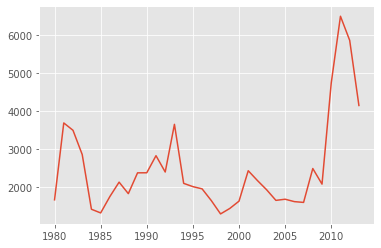

In [132]:
# The plot is the same as before
haiti.plot()

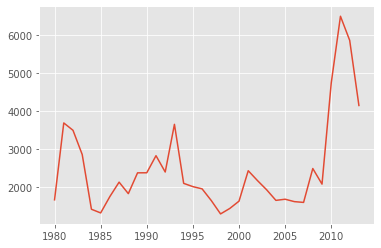

In [134]:
# We can convert the index into integers by
haiti.index = haiti.index.map(int)

# This does not change the plot
haiti.plot()

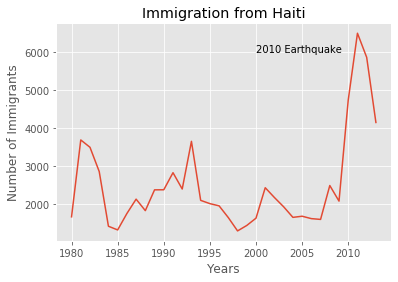

In [135]:
# We can add text to the plot
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show() 

# NOTE: For the text plotting:
# If the years were stored as type 'string', we would need to
# specify x as the index position of the year. Eg 20th index is 
# year 2000 since it is the 20th year with a base year of 1980.

In [136]:
# Get the data for India and China
df_ic = df_can.loc[["India","China"],"1980":"2013"]
display(df_ic)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


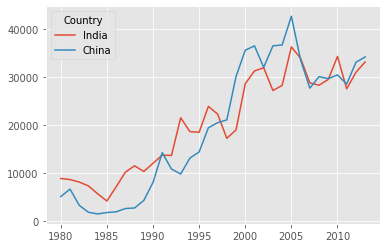

In [137]:
# Plot the data as line plots
df_ic.T.plot(kind = 'line')

Text(0, 0.5, 'Number of people')

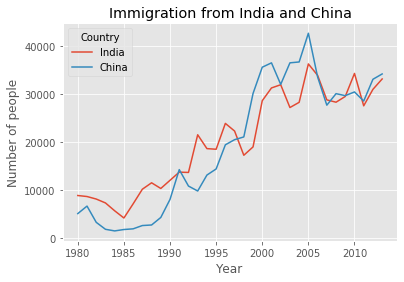

In [138]:
# We can also use the `.transpose` method

df_ic = df_ic.transpose()
df_ic.plot(kind = 'line')
plt.title("Immigration from India and China")
plt.xlabel("Year")
plt.ylabel("Number of people")

In [139]:
# Note that there was no need to transpose the Haiti data as it was series
print(type(haiti))
print(haiti.head(5))

<class 'pandas.core.series.Series'>
1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object


In [158]:
# Compare the trend of top 5 countries that contributed the most to immigration to Canada.

# First drop the irrelevant rows
df_can = df_can.drop(["Total", "Unknown"], axis = 0)
df_can.reset_index()

# Sort the rows by the total column
df_can.sort_values(by = 'Total', ascending=False, inplace = True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


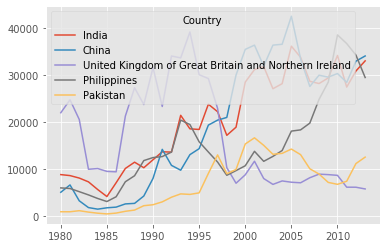

In [162]:
# Plot the top 5 countries
df_can[years].head(5).T.plot(kind = 'line')